# General relativity using symbolic computer algebra
## Introduction to GraviPy

The popular programming language [Python](https://www.python.org) provides a package for symbolic computations called [SymPy](https://www.sympy.org). In 2014, Wojciech Czaja has written the package GraviPy which extends SymPy with functionality useful in doing symbolic calculations in general relativity. The package is available from the [Python Package Index](https://pypi.python.org) (PyPI) as [GraviPy 0.1.0](https://pypi.org/project/gravipy/). In this notebook, we will give an introduction to these packages to the extent needed in the following notebooks.

#### Installation

Probably the easiest way to set up a Python environment for the use with GraviPy is to start with the [Anaconda distribution](https://www.anaconda.org) which is a popular distribution in scientific environments. It provides conda, a package and environment management system allowing us to easily setup a Python environment with all the packages needed to run the notebooks in this collection.

Assuming that you have the Anaconda distribution installed and its binaries in your path, follow these steps to install an environment for use with these notebooks.

1. Create a new environment. Instead of `gravipy` you can use also another name for the environment as long as it does not conflict with already existing environments.
```
conda create --name gravipy python=3.5
```
**Important note**: Python versions more recent than 3.5 are likely to lead to problems with GraviPy 0.1.0 because the insertion order of dict keys is kept in 3.6+ in contrast to previous versions.
1. Activate the new environment. If you have chosen a different name for the environment, you should use it here as well.
```
conda activate gravipy
```
1. Install the SymPy package.
```
conda install sympy
```
1. Install the GraviPy Package from PyPI. At the time of writing, no `conda` package for GraviPy was available, so that we are obliged to install it with `pip`. Note that in the following command the package name is required, not the name of the environment chosen above.
```
pip install gravipy
```
1. In order to run the notebooks in this environment, the Jupyter package needs to be installed as well.
```
conda install jupyter
```
1. After finishing work with the notebooks, you may deactivate the environment.
```
conda deactivate
```

#### Getting started

Before GraviPy can be used, it needs to be imported. GraviPy itself will make sure that the complete namespace of SymPy will be imported. In the second line, we call SymPy's `init_printing` function which will make sure that the visual representation of results will be optimized.

In [1]:
from gravipy import *
init_printing()

For our first steps, we start by considering a two-dimensional sphere embedded in three-dimensional space. Only later will we move to four-dimensional space-time. We begin by introducing symbols and define two of the symbols as coordinates.

In [17]:
r, theta, phi = symbols(r'r, \theta, \phi')
dtheta, dphi = symbols(r'd\theta, d\phi')
x = Coordinates('x', [dtheta, dphi])

On the left-hand side of the first line, we define three variables `r`, `theta` and `pi`. There visual representation is given in the argument of `symbols`, where the backslash refers to the TeX syntax of greek letters. Note the 'r' in front of the string, defining it as a raw string. Otherwise, `\t` would be interpreted as tab character. In the second line, `x` describes the set of two coordinates `theta` and `phi`. The `Coordinates` object possesses and attribute `c` which contains the coordinates:

In [18]:
x.c

At this point, the contravariant components are defined, which in GraviPy are indexed by negative indices:

In [19]:
x.components

In [20]:
x(-1), x(-2)

The covariant components indexed by a positive index are defined only after the associated metric tensor has been defined.

**Note**: With a background in general relativity and/or Python, it may seem odd that numbering in GraviPy starts at 1 and not at 0. However, since the sign is used to distinguish between contravariant and covariant components, the index 0 is not useful.

In order to define the metric tensor `g`, we first introduce a diagonal matrix with the entries appropriate for a sphere of radius `r`.

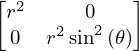

In [21]:
metric = diag(r**2, r**2*sin(theta)**2)
metric

At this point, we just have a SymPy matrix which now needs to be converted into a metric tensor. The first argument gives the symbol used to represent the metric tensor, the second  argument gives the coordinates, and the last argument is the matrix just introduced which defines the components of the metric tensor.  

In [22]:
g = MetricTensor('g', x, metric)

We cn obtain all components of the metric tensor $g_{\mu\nu}$ as follows:

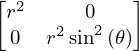

In [23]:
g(All, All)

Correspondingly, its inverse $g^{\mu\nu}$ is obtained by using negative indices.

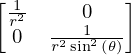

In [24]:
g(-All, -All)

The relation
$$g_{\mu\rho}g^{\rho\nu} = g_\mu^\nu = \delta_\mu^\nu$$
meaning that $g^{\mu\nu}$ is the inverse of $g_{\mu\nu}$ can now easily be verified by a matrix multiplication.

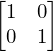

In [25]:
g(All, All)*g(-All, -All)

The mixed representation $g_\mu^\nu$ can be obtained by using a negative sign for only one of the components.

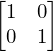

In [26]:
g(-All, All)

or

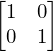

In [27]:
g(All, -All)

Once the metric has been defined, also the covariant coordinates are defined.

In [28]:
x.components

In [30]:
x(-All)*g(All, All)*x(-All).T